# Motor Fraud Insurance Detection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' %x)
sns.set_style("darkgrid")

In [4]:
df=pd.read_csv("Fraud_Data.csv")

In [5]:
df.head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [7]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00
mean,2.79,2.69,39.86,0.06,7710.50,8.48,407.70,2.49,1994.87
std,1.29,1.26,13.49,0.24,4451.51,4.60,43.95,1.12,0.80
min,1.00,1.00,0.00,0.00,1.00,1.00,300.00,1.00,1994.00
25%,2.00,2.00,31.00,0.00,3855.75,5.00,400.00,1.00,1994.00
50%,3.00,3.00,38.00,0.00,7710.50,8.00,400.00,2.00,1995.00
75%,4.00,4.00,48.00,0.00,11565.25,12.00,400.00,3.00,1996.00
max,5.00,5.00,80.00,1.00,15420.00,16.00,700.00,4.00,1996.00


In [8]:
df["FraudFound_P"].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

<AxesSubplot:>

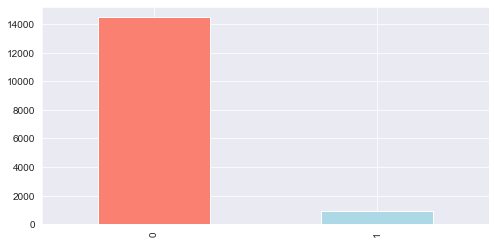

In [10]:
plt.figure(figsize=(8,4))
df["FraudFound_P"].value_counts().plot(kind="bar",color=['salmon','lightblue'])

In [11]:
df["Sex"].value_counts()

Male      13000
Female     2420
Name: Sex, dtype: int64

(array([0, 1]), [Text(0, 0, 'Policy Holder'), Text(1, 0, 'Third Party')])

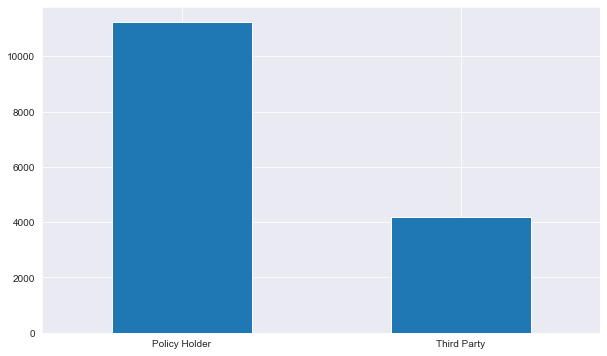

In [12]:
plt.figure(figsize=(10,6))
df["Fault"].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

In [13]:
df.AccidentArea.value_counts()

Urban    13822
Rural     1598
Name: AccidentArea, dtype: int64

(array([0, 1]), [Text(0, 0, 'Urban'), Text(1, 0, 'Rural')])

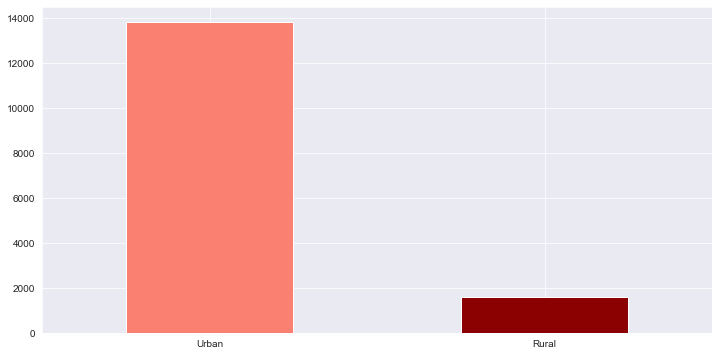

In [14]:
plt.figure(figsize=(12,6))
df.AccidentArea.value_counts().plot(kind='bar',color=["salmon","darkred"])
plt.xticks(rotation=0)

<AxesSubplot:>

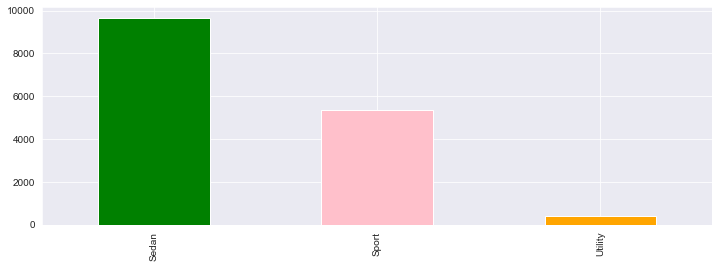

In [15]:
plt.figure(figsize=(12,4))
df.VehicleCategory.value_counts().plot(kind="bar",color=["green","pink","orange"])


In [16]:
df.AgeOfVehicle.value_counts()


7 years        5807
more than 7    3981
6 years        3448
5 years        1357
new             373
4 years         229
3 years         152
2 years          73
Name: AgeOfVehicle, dtype: int64

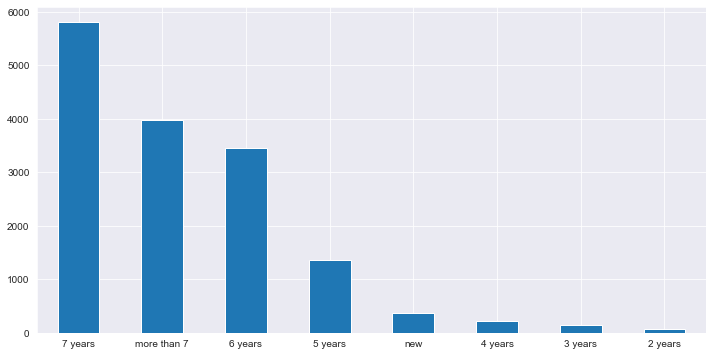

In [17]:
plt.figure(figsize=(12,6))
df.AgeOfVehicle.value_counts().plot(kind="bar")
plt.xticks(rotation=0);

In [18]:
df.WitnessPresent.value_counts()

No     15333
Yes       87
Name: WitnessPresent, dtype: int64

<AxesSubplot:>

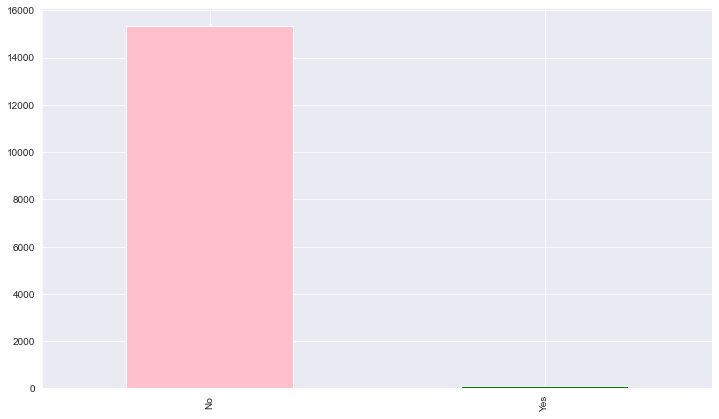

In [19]:
plt.figure(figsize=(12,7))
df.WitnessPresent.value_counts().plot(kind="bar",color=["pink","green"])


In [20]:
df.PoliceReportFiled.value_counts()

No     14992
Yes      428
Name: PoliceReportFiled, dtype: int64

<AxesSubplot:>

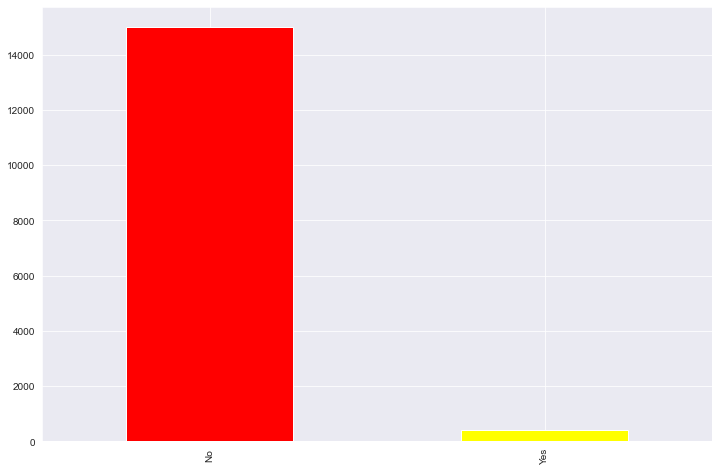

In [21]:
plt.figure(figsize=(12,8))
df.PoliceReportFiled.value_counts().plot(kind="bar",color=["Red","yellow"])

In [22]:
df.DriverRating.value_counts()

1    3944
3    3884
2    3801
4    3791
Name: DriverRating, dtype: int64

<AxesSubplot:>

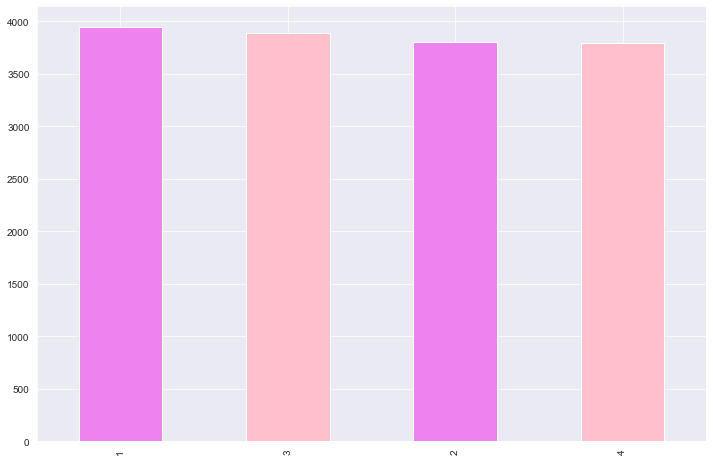

In [23]:
plt.figure(figsize=(12,8))
df.DriverRating.value_counts().plot(kind="bar",color=["violet","pink"])

In [24]:
df.VehiclePrice.value_counts()

20000 to 29000     8079
30000 to 39000     3533
more than 69000    2164
less than 20000    1096
40000 to 59000      461
60000 to 69000       87
Name: VehiclePrice, dtype: int64

In [25]:
df.corr()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.00,0.28,-0.00,-0.01,-0.01,0.01,-0.00,-0.02,-0.00
WeekOfMonthClaimed,0.28,1.00,0.00,-0.01,0.01,0.01,0.01,-0.00,0.01
Age,-0.00,0.00,1.00,-0.03,0.03,-0.01,0.07,0.00,0.03
FraudFound_P,-0.01,-0.01,-0.03,1.00,-0.02,-0.01,0.02,0.01,-0.02
PolicyNumber,-0.01,0.01,0.03,-0.02,1.00,0.01,0.00,-0.01,0.94
RepNumber,0.01,0.01,-0.01,-0.01,0.01,1.00,0.00,0.01,0.01
Deductible,-0.00,0.01,0.07,0.02,0.00,0.00,1.00,0.00,-0.00
DriverRating,-0.02,-0.00,0.00,0.01,-0.01,0.01,0.00,1.00,-0.01
Year,-0.00,0.01,0.03,-0.02,0.94,0.01,-0.00,-0.01,1.00


<AxesSubplot:>

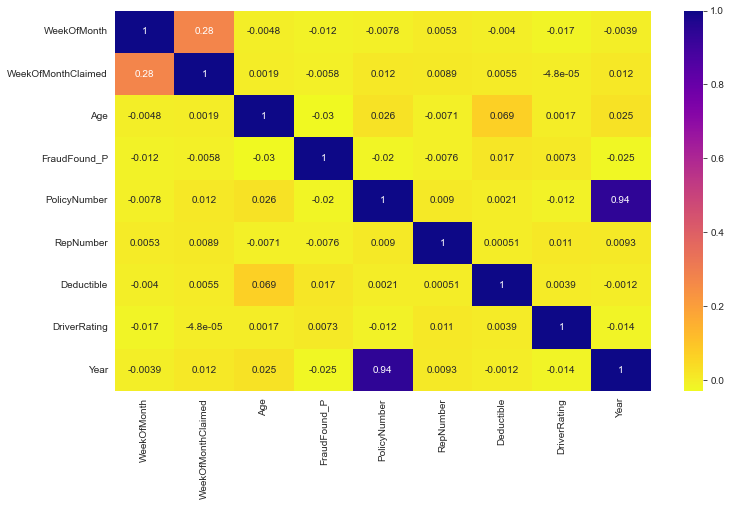

In [26]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='plasma_r')

In [27]:
pd.crosstab(df.FraudFound_P, df.Sex)


Sex,Female,Male
FraudFound_P,,
0,2315,12182
1,105,818


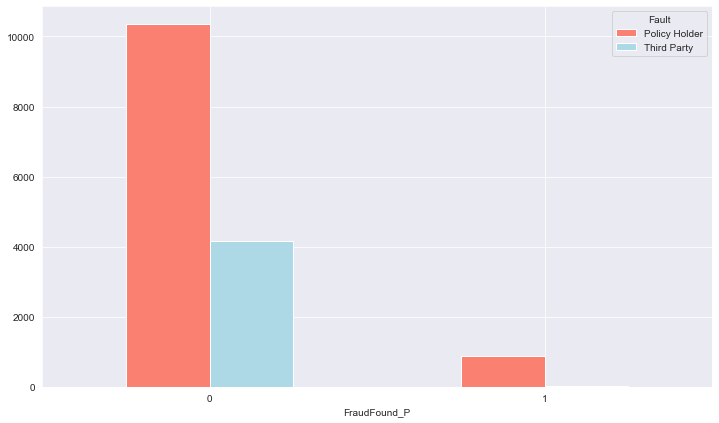

In [28]:
pd.crosstab(df.FraudFound_P, df.Fault).plot(kind="bar",
                                            color = ["salmon","lightblue"],
                                            figsize=(12,7))
plt.xticks(rotation = 0);


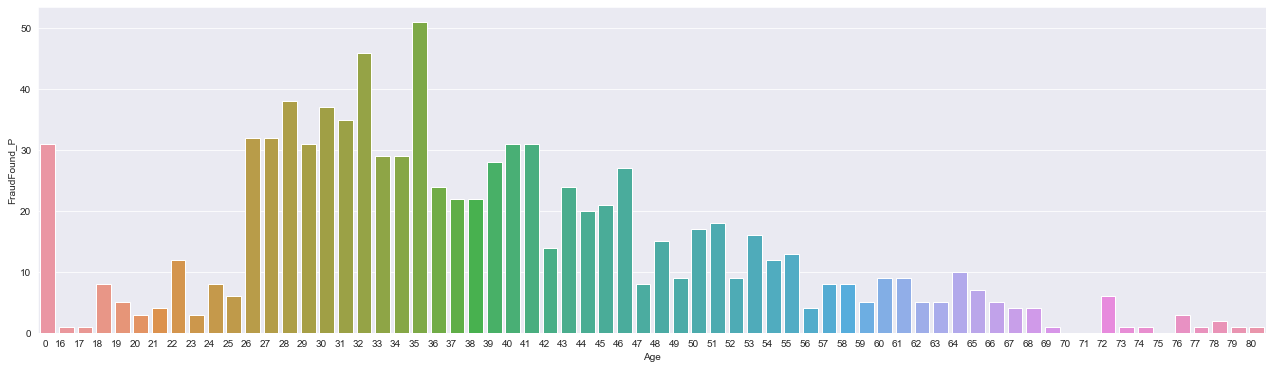

In [29]:
gpd_by_val=df.groupby('Age').agg({'FraudFound_P':'sum'}).reset_index()

fig, (ax1) = plt.subplots(1,1,figsize=(22, 6))
grph =sns.barplot(x='Age', y='FraudFound_P', data = gpd_by_val, ax=ax1)

grph.set_xticklabels(grph.get_xticklabels(),
                    rotation=0,
                    horizontalalignment='right'
                    );

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [31]:
print(df['Age'].unique()==0)
len(df[df['Age']==0])

[False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


320

In [32]:
df_temp = df.copy()
# Finding columns which contains strings
for labels, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(labels)
        

Month
DayOfWeek
Make
AccidentArea
DayOfWeekClaimed
MonthClaimed
Sex
MaritalStatus
Fault
PolicyType
VehicleCategory
VehiclePrice
Days_Policy_Accident
Days_Policy_Claim
PastNumberOfClaims
AgeOfVehicle
AgeOfPolicyHolder
PoliceReportFiled
WitnessPresent
AgentType
NumberOfSuppliments
AddressChange_Claim
NumberOfCars
BasePolicy


In [33]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [34]:
df_temp.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [35]:
df_temp.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00
mean,2.79,2.69,39.86,0.06,7710.50,8.48,407.70,2.49,1994.87
std,1.29,1.26,13.49,0.24,4451.51,4.60,43.95,1.12,0.80
min,1.00,1.00,0.00,0.00,1.00,1.00,300.00,1.00,1994.00
25%,2.00,2.00,31.00,0.00,3855.75,5.00,400.00,1.00,1994.00
50%,3.00,3.00,38.00,0.00,7710.50,8.00,400.00,2.00,1995.00
75%,4.00,4.00,48.00,0.00,11565.25,12.00,400.00,3.00,1996.00
max,5.00,5.00,80.00,1.00,15420.00,16.00,700.00,4.00,1996.00


In [36]:
x=df_temp.drop("FraudFound_P",axis=1)
y=df_temp["FraudFound_P"]

In [37]:
x

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [38]:
y

0        0
1        0
2        0
3        0
4        0
        ..
15415    1
15416    0
15417    1
15418    0
15419    1
Name: FraudFound_P, Length: 15420, dtype: int64

In [39]:
# Models from scikit-learn 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2


# Model Evaluation libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer, accuracy_score
from sklearn.metrics import plot_roc_curve



In [40]:
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x,y,)
       

In [41]:
from collections import Counter
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")
x_train.shape, x_test.shape, y_train.shape, y_test.shape

Training target statistics: Counter({0: 10882, 1: 683})
Testing target statistics: Counter({0: 3615, 1: 240})


((11565, 32), (3855, 32), (11565,), (3855,))

# Target Feature is totally unbalanced so we would apply scikit-learn function to balance the weight of classes

In [42]:
from sklearn.utils import class_weight
class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced',classes= np.unique(y_train), y = y_train)))
class_weights

{0: 0.5313820988788825, 1: 8.466325036603221}

In [43]:
# Let's put our models into dictionary 
models = {"Logistic Regression": LogisticRegression(class_weight=class_weights,solver = 'liblinear'),
          "KNN": KNeighborsClassifier(),
          "Random Forest Classifier": RandomForestClassifier(class_weight=class_weights),
          }

# Let's create a function to fit and later score our models
def fit_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates the given machine learning models
    """
    # random seed for reproduction
    np.random.seed(42)
    
    # Let's create a empty dictionary to keep model score
    model_score = {}
    
    # Let's loop through the models dictionary
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        # Evaluate the score and append it
        model_score[name] = model.score(X_test,y_test)
    return model_score
    